# Machine Learning com Python

## Sobre

Nesse notebook é apresentado um projeto em python que realiza as seguintes tarefas:

0. Entender o desafio proposto
1. Entender Área/Empresa
2. Extração/Obtenção de dados
3. Ajustes de dados (Tratamento/Limpeza)
4. Análise exploratória
5. Analisar os dados
6. Modelagem + algoritmos
7. Interpretação dos resultados

## Desafio

> conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

## Agradecimento

Esse projeto foi desenvolvido graças ao Profº Lira e a [hashtag](https://www.hashtagtreinamentos.com/) pela realização do evento intensivão de python.


# 01: Bibliotecas Necessárias

Para desenvolver esse programa iremos precisar das seguintes bibliotecas:

1. [Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html): Para análise de dados
2. [Seaborn](https://seaborn.pydata.org/index.html): Para construção dos gráficos
3. [Scikit Learn](https://scikit-learn.org/stable/index.html): Para machine learning
4. [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html): Para machine learning e comparar com Scikit

Realizando a instalação no terminal:

```shell
pip install pandas
pip install seaborn
pip install scikit-learn
pip install xgboost
```


In [1]:
import pandas as pd             # Análise de dados
import matplotlib.pyplot as plt # Dependência do Seaborn
import seaborn as sns           # Geração de gráficos

from sklearn.model_selection import train_test_split    # Separar dados para treino e teste
from sklearn.linear_model import LinearRegression       # Modelo de Regressão Linear
from sklearn.ensemble import RandomForestRegressor      # Modelo de Floresta Aleatória
from sklearn import metrics                             # Métricas para performance dos modelos
from xgboost import XGBRegressor                        # Modelo de Gradient Boosting

# 02: A Base de Dados

Após feito o download a base de dados está localizada dentro da pasta 'data':


In [2]:
dados = pd.read_csv('data/advertising.csv') # Importa o dataset
display(dados)                              # Exibe o DataFrame
print(dados.info())                         # Exibe meta informações do DataFrame
display(dados.isna().sum())                 # Exibe o número de valores nulo por coluna

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


TV        0
Radio     0
Jornal    0
Vendas    0
dtype: int64

Realizando uma checagem podemos ver que graças a Deus os dados estão todos limpos, completos e sem tipagem errada. Agora devemos fazer uma análise exploratória com o objetivo de determinar a correlação entre as colunas.


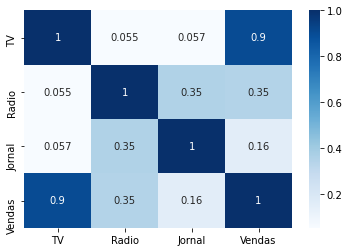

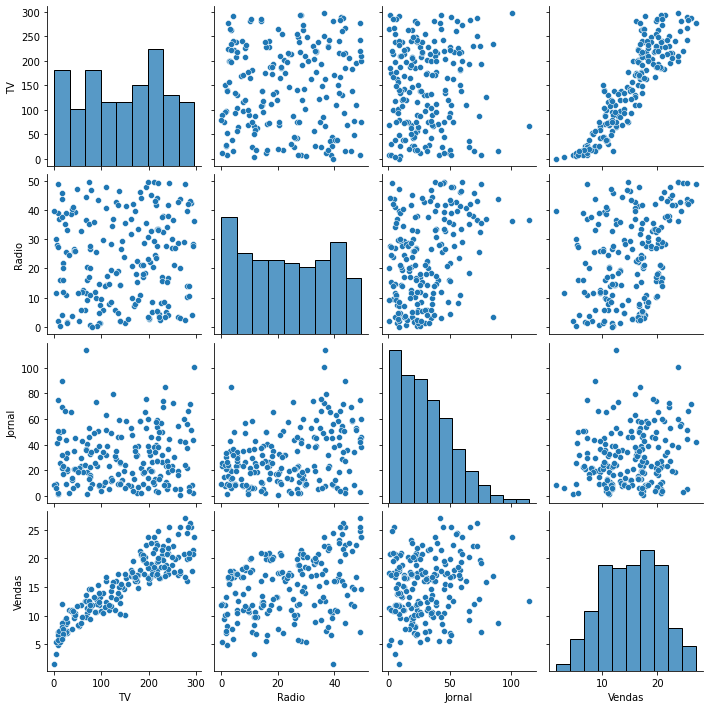

In [3]:
sns.heatmap(dados.corr(), annot=True, cmap='Blues') # Gráfico da matriz de correlação
plt.show()                                          # Exibe o gráfico acima
sns.pairplot(dados, palette='Blues')                # Gráfico coluna a coluna
plt.show()                                          # Exibe o gráfico acima

Analisando o gráfico a única correlação que salta aos olhos é da TV, porém o modelo será feito com todas as features para que no final, poossamos perceber a real importância delas.


# 03: Os Dados dos Modelos

Nessa etapa iremos prepara os dados para os modelos ``RandomForestRegressor``, ``LinearRegression`` e ``XGBRegressor``. Para isso iremos separar nossos dados em ``X`` (Entrada) e ``y`` (Saída) e também em conjunto de treino e testes.


In [4]:
X = dados.drop('Vendas', axis=1)    # Entrada dos modelos sem Vendas
y = dados['Vendas']                 # Saída/alvo dos modelos
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

# 04: Os Treinamentos dos modelos

Feito o preparo dos dados, podemos agora alimentar nossos modelos:


In [5]:
lin_reg = LinearRegression()        # Cria modelo de regressão linear
rf_reg = RandomForestRegressor()    # Cria modelo de floresta aleatória
xgb_reg = XGBRegressor()            # Cria modelo de gradient boosting

lin_reg.fit(X_train, y_train)       # Treina modelo de regressão linear
rf_reg.fit(X_train, y_train)        # Treina modelo de floresta aleatória
xgb_reg.fit(X_train, y_train)       # Treina modelo de gradient boosting

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# 05: As Avaliações dos Modelos

Depois do treino, chegou a hora da prova. Para serem avaliados, o metódo utilizado será duas métricas:

- R²: Indica a percentagem que o modelo explica
- MSE: Indica o quanto o modelo erra
- MAE: Similar ao MSE porém utiliza valores absolutos


In [6]:
pred_lin = lin_reg.predict(X_test)  # Predições do modelo Linear
pred_rf = rf_reg.predict(X_test)    # Predições do modelo Floresta
pred_xgb = xgb_reg.predict(X_test)  # Predições do modelo Gradiente

r2_lin = metrics.r2_score(y_test, pred_lin) # R2 do Linear
r2_rf = metrics.r2_score(y_test, pred_rf)   # R2 da Floresta
r2_xgb = metrics.r2_score(y_test, pred_lin) # R2 do Gradiente

mse_lin = metrics.mean_squared_error(y_test, pred_lin)  # MSE do Linear
mse_rf = metrics.mean_squared_error(y_test, pred_rf)    # MSE da Floresta
mse_xgb = metrics.mean_squared_error(y_test, pred_xgb)  # MSE do Gradiente

mae_lin = metrics.mean_absolute_error(y_test, pred_lin)  # MAE do Linear
mae_rf = metrics.mean_absolute_error(y_test, pred_rf)    # MAE da Floresta
mae_xgb = metrics.mean_absolute_error(y_test, pred_xgb)  # MAE do Gradiente

print(f'''
LinearRegressor:\tR2={r2_lin*100:.2f}%\tMSE={mse_lin:.2f}\tMAE={mae_lin:.2f}
RandomForestRegressor:\tR2={r2_rf*100:.2f}%\tMSE={mse_rf:.2f}\tMAE={mae_rf:.2f}
XGBRegressor:\t\tR2={r2_xgb*100:.2f}%\tMSE={mse_xgb:.2f}\tMAE={mae_xgb:.2f}
''')


LinearRegressor:	R2=86.92%	MSE=3.94	MAE=1.37
RandomForestRegressor:	R2=91.22%	MSE=2.64	MAE=1.19
XGBRegressor:		R2=86.92%	MSE=2.31	MAE=1.16



Analisando os resultados percebemos algo interessante, apesar do R2 do ``XGBRegressor`` ser menor que o R2 do ``RandomForestRegressor``, podemos notar que seu MSE também ficou menor, que a primeiro momento parece ser contra intuitivo. Para fazer uma comparação mais detalhada iremos fazer a interpretação análise gráfica desses resultados.


# 06: A Interpretação dos Resultados

Para finalizar, iremos avaliar:

1. Se as previsões dos modelos estão corretas
2. Qual é o mais preciso
3. A informação que podemos retirar dos modelos
4. Se a situação atual está condizente com essa informação


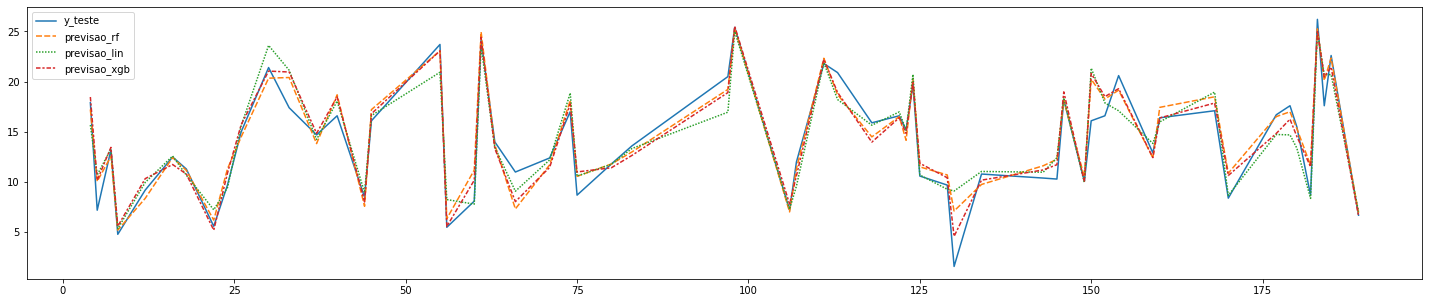

,y_teste,previsao_rf,previsao_lin,previsao_xgb
18,11.3,11.165,10.689093,10.798644
170,8.4,10.882,8.673711,10.653033
107,12.0,11.341,9.599699,10.619537
98,25.4,25.318,24.999898,25.508776
177,16.7,16.518,14.735906,14.841530
182,8.7,11.677,8.376049,11.524680
5,7.2,10.066,10.703504,10.179874
146,18.2,18.164,18.376707,18.981131
12,9.2,8.378,9.967003,10.340646
152,16.6,18.269,17.879468,18.509218


In [7]:
resultado = pd.DataFrame()  # DataFrame para armazenar os resultados

resultado['y_teste'] = y_test           # Entra com os dados esperados
resultado['previsao_rf'] = pred_rf      # Entra com previsão da Floresta
resultado['previsao_lin'] = pred_lin    # Entra com previsão do Linear
resultado['previsao_xgb'] = pred_xgb    # Entra com previsão do Gradiente

plt.figure(figsize=(25, 5))     # Ajusta as dimensões do gráfico
sns.lineplot(data=resultado)    # Cria o gráfico dos resultados
plt.show()                      # Mostra o gráfico acima

display(resultado)  # Mostra o DataFrame

Analisando o gráfico podemos observar que de fato todos os modelos estão representando bem o problema, porém não fica claro se o modelo ``RandomForestRegressor`` é superior ao ``XGBRegressor``. Oque podemos perceber é que o ``XGBRegressor`` se sai um pouco melhor com valores distantes da média.

Depois de conferir a precisão dos modelos precisamos saber se os investimentos foram feitos de maneira correta, para isso preciamos ver a importância do investimento em relação ao valor de retorno.


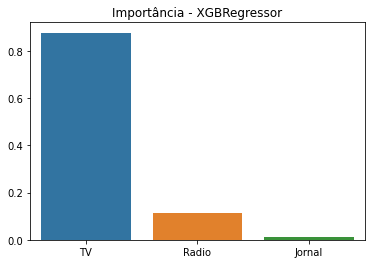

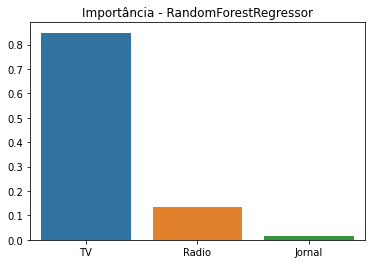

In [8]:
sns.barplot(x=X_train.columns, y=xgb_reg.feature_importances_)
plt.title('Importância - XGBRegressor')
plt.show()

sns.barplot(x=X_train.columns, y=rf_reg.feature_importances_)
plt.title('Importância - RandomForestRegressor')
plt.show()

Podemos observar que apesar das diferenças, ambos os modelos colocam enorme importância em TV, alguma importância em rádio e quase nada em jornal. Agora devemos voltar aos valores investidos para ver se eles fazem algum sentido.


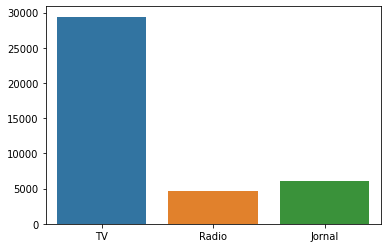

In [15]:
sns.barplot(x=X.columns, y=X.sum())
plt.show()

# 07: Conclusão

Analisando o gráfico de investimentos reparamos que o investimento em TV faz sentido, porém notamos também um erro grave em investir uma maior quantidade de dinheiro em jornal sendo que o retorno do rádio é muito maior.
